# __Estudio de los movimientos de una ficha en el parchís de dos dados__

En este estudio, calcularemos mediante un método iterativo todos los posibles movimientos que una ficha de parchís puede realizar debido a una jugada con tiradas de dos dados. Caracterizaremos estos movimientos para obtener su distribución y la distribución de probabilidad de cada movimiento. Tendremos que entender las reglas del juego para poder generar todas las jugadas, clasificarlas y caracterizarlas.

Las reglas del juego que nos interesan para este estudio son:

- Si en una tirada los dados tienen el mismo valor (tirada dobles), se repite la tirada.
- Si se ha sacado tres tiradas dobles en una misma jugada, se considera inválida. 

Entonces, una jugada es un conjunto de máximo tres tiradas, con dos dados por tirada, ordenadas de forma secuencial. Las jugadas las representaremos como sigue:
$$$$
$$[(5,6)]$$
$$[(3,3),(1,6)]$$
$$[(1,1),(2,2),(4,5)]$$
$$$$
Donde cada par de números representa una tirada, $(5,6)$ y cada número de la tirada, el valor de cada dado.  
  
Una tirada es dobles, si los dos dados tienen el mismo valor mientras que, una jugada la consideraremos dobles si la última tirada es dobles. Todas las jugadas así definidas, se pueden clasificar en jugadas posibles e imposibles ateniéndonos a las reglas anteriores. Además, dentro de las jugadas posibles las clasificaremos como válidas e invalidas. Las jugadas imposibles son aquellas que con las reglas del parchís no se pueden dar. Mientras que, las jugadas inválidas son aquellas que se pueden dar, pero las reglas del juego así las consideran. Un ejemplo de cada tipo de jugada:
$$$$
$$[(5,6),(3,3)] => Jugada\ imposible$$
$$[(3,3),(1,6)] => Jugada\ posible\ válida$$
$$[(1,1),(2,2),(5,5)] => Jugada\ posible\ inválida$$
$$$$

Para todas las jugadas posibles, es decir tanto válidas como inválidas, estudiaremos las métricas, suma total y sumas parciales:

- La **suma total** es el resultado de sumar todos los valores de los dados de todas las tiradas en la jugada:

$$$$
$$[(5,6)] => 11$$
$$[(3,3),(1,6)] => 13$$
$$$$

- Las **sumas parciales** se obtienen considerando cada valor del dado por separado, sin embargo, consideramos que si hay dobles en la última tirada, cuenta como un solo valor. También, si tenemos jugadas de más de una tirada, las sumas parciales serán la suma total de todas las tiradas menos la última más las sumas parciales de la última tirada:

$$$$
$$[(5,6)] => 5, 6$$
$$[(5,5)] => 5$$
$$[(3,3),(1,6)] => 7, 12$$
$$$$

Utilizamos estas métricas para caracterizar las posibles jugadas del juego pues se relacionan con aspectos interesantes de saber a la hora de jugar al parchís. La **suma total** se relaciona con el avance máximo de una ficha por jugada o turno mientras que, si consideramos conjuntamente las **sumas parciales** y la **suma total**, podemos saber todos los posibles movimientos que puede tener una ficha en un turno. Esto se relaciona con el avance para llegar a un cierto objetivo, ya sea comer una ficha de otro jugador o llegar a una casilla segura.  
  
Antes de pasar a código estas dos métricas, primero tenemos que desarrollar dos funciones auxiliares. Una que nos permita quitar la última tirada de una jugada y otra que calcule si una jugada se considera dobles o no. Estas funciones nos servirán para el cálculo de las métricas y para el cálculo de todas las jugadas del parchís.

In [1]:
## Definimos una funcion para quitar la ultima tirada de una jugada
def dropLastTirada(jugada: list): 
    dimNuevaJugada = len(jugada) - 1
    nuevaJugada = []
    i = 0
    while len(nuevaJugada) < dimNuevaJugada:
        nuevaJugada.append(jugada[i])
        i = i + 1
    
    return nuevaJugada

In [2]:
## Definimos una funcion que nos permita saber si la ultima tirada de una jugada es dobles
def isDobles(jugada: list):
    ultimaTirada = jugada[len(jugada) - 1]
    ultimoDado_1 = ultimaTirada[0]
    ultimoDado_2 = ultimaTirada[1]
    
    return ultimoDado_1 == ultimoDado_2

Desarrollamos el cálculo de las métricas suma total y sumas parciales:

In [3]:
## Suma total dada una jugada
def sumTotalJugada(jugada: list):
    suma = 0
    for tirada in jugada:
        for valorDado in tirada:
            suma = suma + valorDado
    
    return suma

In [4]:
## Definimos las sumas parciales considerando que si es dobles, solo hay una y si no es dobles, dos
def sumPartialsJugada(jugada: list):
    sumaJugadaSinUltimaTirada = sumTotalJugada(dropLastTirada(jugada))
    ultimaTirada = jugada[len(jugada) - 1]
    
    ultimoDado_1 = ultimaTirada[0]
    ultimoDado_2 = ultimaTirada[1]
    
    sumaParcial_1 = sumaJugadaSinUltimaTirada + ultimoDado_1
    sumaParcial_2 = sumaJugadaSinUltimaTirada + ultimoDado_2
    
    if isDobles(jugada):
        return [sumaParcial_1]
    else:
        return [sumaParcial_1, sumaParcial_2]

Una vez desarrollado el cálculo de las dos métricas, tenemos que generar todas las jugadas posibles en el parchís de máximo tres tiradas. Recordar que dentro de las jugadas posibles podemos clasificarlas en válidas e inválidas.  
Para generar todas las jugadas posibles vamos a utilizar un método iterativo que dada una jugada, calculamos la jugada siguiente atendiendo a una cierta lógica. La explicamos a continuación:  
1. Partimos de la jugada mínima: $[(1,1)]$, que es una jugada de una sola tirada, la tirada mínima: $(1,1)$.
  
2. Si la jugada actual es dobles y tiene menos de tres tiradas, la jugada siguiente será la actual más la tirada mínima.
  
3. Si la jugada actual no es dobles o es dobles con tres tiradas, la jugada siguiente será la actual, sumando un valor a uno de los dados de la última tirada. Para cubrir todas las jugadas posibles, primero sumamos un valor al segundo dado hasta que llega a $6$. Entonces, será cuando sumamos un valor al primer dado y el segundo dado tomará este mismo valor. De esta forma, el valor del segundo dado será siempre mayor o igual al del primer dado, por lo que tiradas como $(5,2)$ no se darán. Sin embargo, esto no presenta algún problema a la hora de obtener todas las jugadas posibles, pues esta tirada es igual, a efecto de las métricas que queremos calcular, que su tirada equivalente $(2,5)$. Esta lógica que se repetirá más adelante la llamaremos "sumar valor a los dados".
  
4. Si la jugada actual tiene tres tiradas, su última tirada es $(6,6)$ y su penúltima tirada es distinta a $(6,6)$, quitaremos una tirada a la jugada actual y, a la última tirada de esta nueva jugada, le sumaremos un valor a los dados.
  
5. Por último, si la jugada actual tiene tres tiradas y su última y penúltima tirada es $(6,6)$, quitaremos dos tiradas a la jugada actual y, a la última tirada de esta nueva jugada, le sumaremos un valor a los dados.
  
El bucle terminará llegando a la jugada máxima, compuesta por tres tiradas máximas: $[(6,6),(6,6),(6,6)]$ y finalizará, pues habremos calculado todas las jugadas posibles en el juego del parchís.  
  
Para este bucle, necesitamos codificar desarrollar funciones como, la de añadir la tirada mínima, la de sumar valor a los dados, pues la de quitar la última tirada y la de saber si es dobles una jugada ya las hemos desarrollado. Además, debemos desarrollar una función que, dada una jugada, nos calcule la siguiente ateniéndonos a la lógica anteriormente planteada.

In [5]:
## Definimos una función que añade la tirada mínima a una jugada
def addMinimumTirada(jugada: list):        
    tiradaMinima = [1,1]
    
    nuevaJugada = []
    for tirada in jugada:
        nuevaJugada.append(tirada)
    
    nuevaJugada.append(tiradaMinima)

    return nuevaJugada

In [6]:
## Definimos una función que aplique la logica de sumar valor a los dados
def sumValueToDados(jugada: list):
    ultimaTirada = jugada[len(jugada) - 1]
    ultimoDado_1 = ultimaTirada[0]
    ultimoDado_2 = ultimaTirada[1]
    
    nuevaJugada = dropLastTirada(jugada)
    if ultimoDado_2 < 6:
        nuevaJugada.append([ultimoDado_1, ultimoDado_2 + 1])
    else:
        nuevaJugada.append([ultimoDado_1 + 1, ultimoDado_1 + 1])
    
    return nuevaJugada

In [7]:
## Definimos una funcion que dada una jugada calcule su siguiente jugada, ateniendose a la logica anterior
def calculateNextJugada(jugada: list):
    maxTirada = [6,6]
    maxJugada = [maxTirada, maxTirada, maxTirada]
    numTiradas = len(jugada)
    ultimaTirada = jugada[numTiradas - 1]
    
    if numTiradas == 3:
        penultimaTirada = jugada[numTiradas - 2]
    else:
        penultimaTirada = []
        
    if jugada == maxJugada:
        nuevaJugada = []        
    elif numTiradas < 3 and isDobles(jugada):
        nuevaJugada = addMinimumTirada(jugada)    
    elif numTiradas <= 3 and ultimaTirada != maxTirada:
        nuevaJugada = sumValueToDados(jugada)
    elif numTiradas == 3 and ultimaTirada == maxTirada and penultimaTirada != maxTirada:
        nuevaJugada = sumValueToDados(dropLastTirada(jugada))
    else:
        nuevaJugada = sumValueToDados(dropLastTirada(dropLastTirada(jugada))) 
    
    
    return nuevaJugada

Como vemos, cuando la jugada es la jugada máxima, esta función devuelve una lista vacía, esta va a ser la orden de salida del bucle que crearemos a continuación.  
  
Además, vamos a crear dos funciones más. Una que dada una jugada nos calcule su jugada equivalente, pues, como hemos visto, la lógica desarrollada no las calcula. También, otra función que determine si una jugada posible es válida o no, ateniéndose a las reglas del parchís, para poder clasificar las jugadas posibles en válidas e inválidas.

In [8]:
## Definimos una función que calcule la jugada equivalente
def calculateEquivalentJugada(jugada:list):
    equivalenteJugada = []
    for tirada in jugada:
        dado_1 = tirada[0]
        dado_2 = tirada[1]
        equivalenteTirada = [dado_2, dado_1]
        equivalenteJugada.append(equivalenteTirada)
    
    return equivalenteJugada

In [9]:
## Definimos una función que determine si una jugada es invalida
def isInvalida(jugada: list):
    if len(jugada) < 3:
        return False
    
    isInvalida = True
    for tirada in jugada:
        dado_1 = tirada[0]
        dado_2 = tirada[1]
        isInvalida = isInvalida and (dado_1 == dado_2)
    
    return isInvalida

A la vez que calculamos las posibles jugadas, vamos a calcular su valor de las métricas de suma total y sumas parciales.  
Crearemos dos tipos de acumuladores tanto para la métrica **suma total** como para **sumas parciales** y **suma total** conjuntamente:

 - Acumulador tipo contador: nos informará de cuantas jugadas hay para cada valor de una métrica. Este acumulador nos permitirá crear una distribución de las jugadas en el parchís. Será de tipo lista de enteros y, para las métricas que vamos a describir, tendrá una dimensión de 36, que es la suma total de la jugada máxima.
 - Acumulador de jugadas: en este acumulador se irán clasificando las jugadas por su valor de cada métrica. Una vez calculado, sabremos qué jugadas tienen cierto valor de una métrica y podremos calcular la probabilidad de ese valor de la métrica. Será de tipo lista de listas e igual que el acumulador tipo contador, tendrá dimensión de 36.
 
En estos acumuladores, en la posición $i$ del array, se encontrarán el número de jugadas o las jugadas (dependiendo del tipo de acumulador) que tienen el valor de la métrica $i+1$. Además, para cada métrica, definiremos dos tipos de acumuladores, uno para todas la jugadas posibles y otro para todas las jugadas posibles válidas.  
Inicializamos los acumuladores, como decimos, tienen dimensión de 36, la suma total de la jugada máxima:

In [10]:
## Acumuladores para la métrica suma total
contTotal = []
contTotalValidas = []
accJugadasTotal = []
accJugadasTotalValidas = []

## Acumuladores para las metricas sumas parciales y suma total
contParcialTotal = []
contParcialTotalValidas = []
accJugadasParcialTotal = []
accJugadasParcialTotalValidas = []

maxTirada = [6,6]
maxJugada = [maxTirada, maxTirada, maxTirada]

i = 0
while i < sumTotalJugada(maxJugada):
    ## Acumuladores para la métrica suma total
    contTotal.append(0)
    contTotalValidas.append(0)
    accJugadasTotal.append([])
    accJugadasTotalValidas.append([])

    ## Acumuladores para las metricas sumas parciales y suma total
    contParcialTotal.append(0)
    contParcialTotalValidas.append(0)
    accJugadasParcialTotal.append([])
    accJugadasParcialTotalValidas.append([])
    i = i + 1

Con estos acumuladores definidos e inicializados, ya estamos en posición de crear un bucle que calcule todas las jugadas posibles en el parchís. 

In [11]:
## Iniciamos el bucle con la jugada minima
minTirada = [1,1]
jugadaActual = [minTirada]

while jugadaActual != []:
    ## Caracterizamos la actual jugada por su suma total
    sumaTotal = sumTotalJugada(jugadaActual)
    ## Calculamos el indice de los acumuladores donde va a incidir la suma total esta jugada
    indice = sumaTotal - 1 
    
    ## Aumentamos los acumuladores de la suma total
    ## Jugadas dobles solo hay una pero, jugadas no dobles hay dos posibles
    if isDobles(jugadaActual):
        contTotal[indice] = contTotal[indice] + 1
        accJugadasTotal[indice].append(jugadaActual)
        if not isInvalida(jugadaActual):
            contTotalValidas[indice] = contTotalValidas[indice] + 1
            accJugadasTotalValidas[indice].append(jugadaActual)
    else:
        contTotal[indice] = contTotal[indice] + 2
        accJugadasTotal[indice].append(jugadaActual)
        accJugadasTotal[indice].append(calculateEquivalentJugada(jugadaActual))
        if not isInvalida(jugadaActual):
            contTotalValidas[indice] = contTotalValidas[indice] + 2
            accJugadasTotalValidas[indice].append(jugadaActual)
            accJugadasTotalValidas[indice].append(calculateEquivalentJugada(jugadaActual))
    
    
    
    ## Caracterizamos la actual jugada por sus sumas parciales y su suma total
    sumasParciales = sumPartialsJugada(jugadaActual)
    ## Calculamos los indices de los acumuladores donde va a incidir todas las sumas para esta jugada
    indices = []
    indices.append(indice)
    for sumaParcial in sumasParciales:
        indices.append(sumaParcial - 1)
    
    ## Aumentamos los acumuladores de las sumas parciales y total
    ## Jugadas dobles solo hay una pero, jugadas no dobles hay dos posibles
    for indice in indices:
        if isDobles(jugadaActual):
            contParcialTotal[indice] = contParcialTotal[indice] + 1
            accJugadasParcialTotal[indice].append(jugadaActual)
            if not isInvalida(jugadaActual):
                contParcialTotalValidas[indice] = contParcialTotalValidas[indice] + 1
                accJugadasParcialTotalValidas[indice].append(jugadaActual)
        else:
            contParcialTotal[indice] = contParcialTotal[indice] + 2
            accJugadasParcialTotal[indice].append(jugadaActual)
            accJugadasParcialTotal[indice].append(calculateEquivalentJugada(jugadaActual))
            if not isInvalida(jugadaActual):
                contParcialTotalValidas[indice] = contParcialTotalValidas[indice] + 2
                accJugadasParcialTotalValidas[indice].append(jugadaActual)
                accJugadasParcialTotalValidas[indice].append(calculateEquivalentJugada(jugadaActual))
    
    
    ## Calculamos la siguiente Jugada
    jugadaActual = calculateNextJugada(jugadaActual)

Ejecutado este bucle, ya tenemos caracterizadas todas las jugadas por su suma total y por el conjunto de sumas parciales y suma total.  
  
Un primer dato que podemos obtener de estos acumuladores es el número total de jugadas posibles y jugadas posibles válidas que existen en el juego del parchís. Para ello, tenemos que fijarnos en los acumuladores de suma total, pues tenemos cada jugada posible y cada jugada posible válida sin duplicidad. Mientras que, si nos fijáramos en los acumuladores del conjunto sumas parciales y suma total, tenemos cada jugada posible y cada jugada posible válida con duplicidad dos, si la jugada es dobles, y con duplicidad tres si no lo es. Debido a esta duplicidad, no nos sirve fijarnos en estos acumuladores para conocer este dato.  
  
Entonces, si sumamos todos los valores de **contTotal[i]** obtendremos el número de jugadas posibles del parchís mientras que, si sumamos todos los valores de **contTotalValidas[i]** obtendremos el número de jugadas posibles y válidas.

In [12]:
numPosiblesJugadas = 0
for num in contTotal:
    numPosiblesJugadas = numPosiblesJugadas + num


numPosiblesJugadasValidas = 0
for num in contTotalValidas:
    numPosiblesJugadasValidas = numPosiblesJugadasValidas + num

___________________________________________________________________________________________________________________________
**Nota:**  
Para ejecutar la celda posterior satisfactoriamente, es necesario ejecutar los siguientes comandos en la consola:
  1. pip install jupyter_contrib_nbextensions
  2. jupyter contrib nbextension install --user
  3. jupyter nbextension enable python-markdown/main
  4. Reiniciar este notebook.

Esto es debido a que las celdas tipo Markdown no admiten de forma implícita escribir variables calculadas en celdas tipo Code.  
**Crédito:** https://github.com/ipython-contrib/jupyter_contrib_nbextensions
___________________________________________________________________________________________________________________________

El número total de jugadas posibles en el parchís es de **{{numPosiblesJugadas}}** mientras que, el subconjunto de las mismas que se consideran válidas es de **{{numPosiblesJugadasValidas}}**, lo que nos deja un total de **{{numPosiblesJugadas-numPosiblesJugadasValidas}}** de jugadas inválidas debido a sacar tres tiradas dobles en la misma jugada. Sería erróneo decir que tenemos un {{"{0:.1f}".format(((numPosiblesJugadas - numPosiblesJugadasValidas)/numPosiblesJugadas) * 100)}}% de probabilidad de sacar una jugada inválida pues no todas las jugadas son equiprobables, debido a la probabilidad condicionada de sucesos. Este punto lo veremos más adelante.

A continuación, procedemos a representar la distribución de las jugadas acorde con las métricas propuestas. Para ello utilizaremos la librería MatPlotLib y tendremos que convertir nuestros acumuladores tipo contador a objetos DataFrames de la librería pandas.  
Desarrollamos una función que dado un acumulador (un array que para cada índice tiene un valor), lo convierta a una objeto pandas.DataFrame. Otro cometido de esta función, es corregir el desfase del índice del acumulador con el valor de la métrica, de forma que el DataFrame resultante tenga bien asociado el valor de la métrica al valor del acumulador. Esta función la utilizaremos más adelante, por lo que dejamos el nombre de la magnitud del eje de coordenadas como parámetro:

In [13]:
## Funcion para crear DataFrames a partir de los acumuladores
import pandas as pd
def createAccDF(acc:list, y_label:str):
    accParaDF = []
    i = 1
    for value in acc:
        accParaDF.append([i,value])
        i = i + 1
    
    accDF = pd.DataFrame.from_records(accParaDF, columns=["valor_metrica",y_label])
    
    return accDF

Con esta función desarrollada, podemos crear DataFrames para su representación de los acumuladores tipo contadores para ambas métricas, de las jugadas posibles y de las jugadas posibles válidas:

In [14]:
## DataFrames para la metrica suma total
contTotalDF = createAccDF(contTotal,"valor_cont")
contTotalValidasDF = createAccDF(contTotalValidas,"valor_cont")

## DataFrames para las metricas sumas parciales y suma total
contParcialTotalDF = createAccDF(contParcialTotal,"valor_cont")
contParcialTotalValidasDF = createAccDF(contParcialTotalValidas,"valor_cont")

Si quieres ver el valor de estos contadores para cada métrica, ejecuta las celdas siguientes. Sino, a continuación representaremos la distribución de cada una de las métricas.

In [15]:
##Numero de jugadas posibles clasificadas por la metrica suma total
contTotalDF.head(len(contTotal))

,valor_metrica,valor_cont
0,1,0
1,2,1
2,3,2
3,4,4
4,5,6
5,6,10
6,7,14
7,8,19
8,9,24
9,10,31


In [16]:
##Numero de jugadas posibles validas clasificadas por la metrica suma total
contTotalValidasDF.head(len(contTotalValidas))

,valor_metrica,valor_cont
0,1,0
1,2,1
2,3,2
3,4,4
4,5,6
5,6,9
6,7,14
7,8,16
8,9,24
9,10,25


In [17]:
##Numero de jugadas posibles clasificadas por la metrica sumas parciales y suma total
contParcialTotalDF.head(len(contParcialTotal))

,valor_metrica,valor_cont
0,1,11
1,2,12
2,3,24
3,4,26
4,5,50
5,6,54
6,7,80
7,8,85
8,9,123
9,10,130


In [18]:
##Numero de jugadas posibles validas clasificadas por la metrica sumas parciales y suma total
contParcialTotalValidasDF.head(len(contParcialTotalValidas))

,valor_metrica,valor_cont
0,1,11
1,2,12
2,3,24
3,4,26
4,5,49
5,6,52
6,7,77
7,8,79
8,9,117
9,10,118


Con matplotlib, vamos a representar estas distribuciones de las métricas.

In [19]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


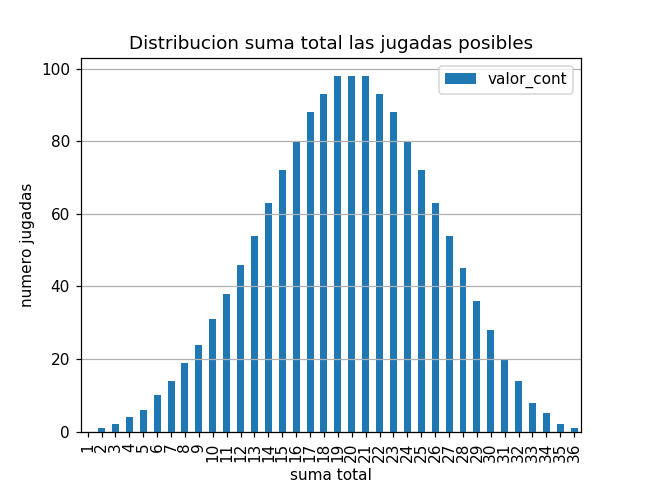

In [46]:
%matplotlib notebook
contTotalDF.plot(kind='bar',x='valor_metrica',y='valor_cont')
plt.title("Distribucion suma total las jugadas posibles")
plt.xlabel("suma total")
plt.ylabel("numero jugadas")
plt.grid(axis='y')
plt.show()

<IPython.core.display.Javascript object>


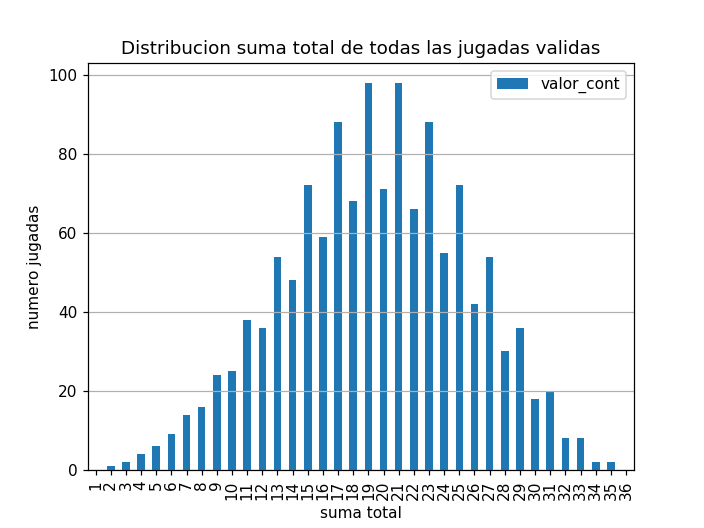

In [44]:
%matplotlib notebook
contTotalValidasDF.plot(kind='bar',x='valor_metrica',y='valor_cont')
plt.title("Distribucion suma total de todas las jugadas validas")
plt.xlabel("suma total")
plt.ylabel("numero jugadas")
plt.grid(axis='y')
plt.show()

<IPython.core.display.Javascript object>


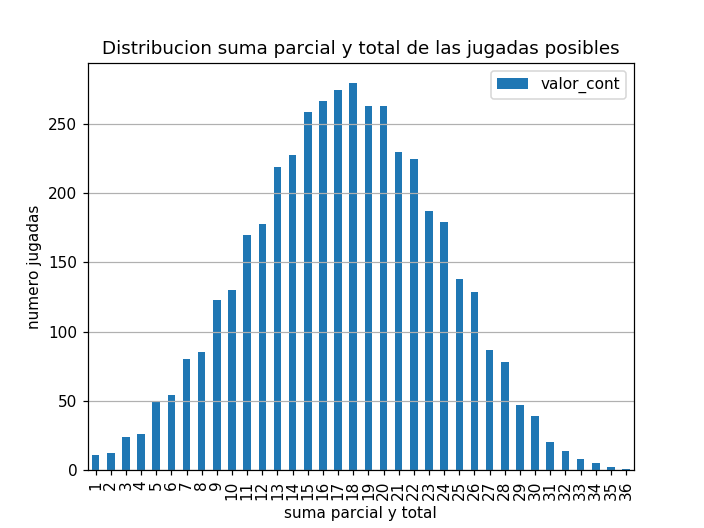

In [43]:
%matplotlib notebook
contParcialTotalDF.plot(kind='bar',x='valor_metrica',y='valor_cont')
plt.title("Distribucion suma parcial y total de las jugadas posibles")
plt.xlabel("suma parcial y total")
plt.ylabel("numero jugadas")
plt.grid(axis='y')
plt.show()

<IPython.core.display.Javascript object>


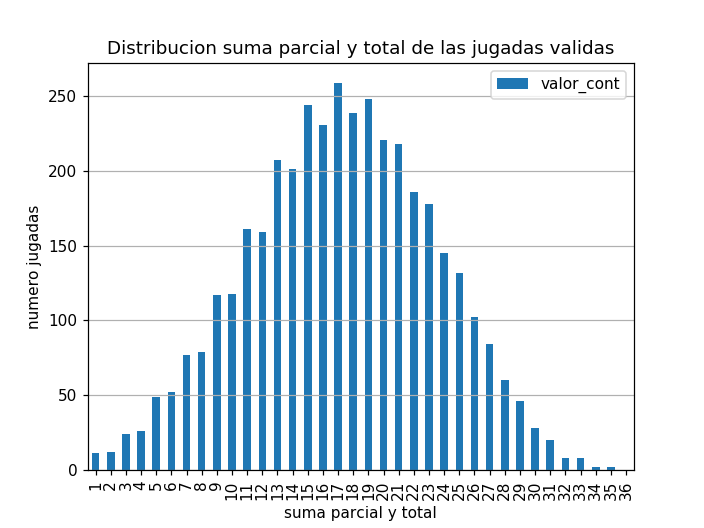

In [42]:
%matplotlib notebook
contParcialTotalValidasDF.plot(kind='bar',x='valor_metrica',y='valor_cont')
plt.title("Distribucion suma parcial y total de las jugadas validas")
plt.xlabel("suma parcial y total")
plt.ylabel("numero jugadas")
plt.grid(axis='y')
plt.show()

Nos fijamos en que la diferencia entre las distribuciones se suma total de jugadas posibles y posibles válidas se da en las métricas que tienen valor par, pues solo se consideran inválidas las jugadas con tres dobles, cuya suma total siempre es par. Esto no ocurre entre las distribuciónes de sumas parciales y total, pues las sumas parciales no tiene que por qué sumar par en una jugada inválida, por ejemplo: 
$$$$
$$[(1,1),(2,2),(3,3)] => 9$$
$$$$
Para todos los tipos de jugadas, es tentativo pensar que el valor esperado de la suma total estará en torno a {{20}}, mientras que de las sumas parciales y total en torno a {{17}}. Pero esto es un error, debido a la misma razón por lo que el {{"{0:.1f}".format(((numPosiblesJugadas - numPosiblesJugadasValidas)/numPosiblesJugadas) * 100)}}% de las jugadas posibles son inválidas, todas las jugadas posibles no son equiprobables. 
  
A continuación estudiaremos la probabilidad de cada jugada y presentaremos la distribución de probabilidad de las jugadas posibles y las jugadas válidas para ambas métricas.

La probabilidad de que salga un valor específico en un dado de $6$ caras, es de $1/6$, pues hay $6^1$ valores posibles y cada uno es equiprobable. Lo mismo ocurre con una tirada de dos dados, como hay $6^2$ (es decir, $36$) posibles valores y todos son equiprobables, la probabilidad de una tirada es de $1/36$.  
Atendiendo a las métricas que estamos calculando, si $n$ tiradas, con $n < 36$ tienen el mismo valor de la métrica $x$, entonces que, ante una tirada salga ese valor, existe una probabilidad de:
$$$$
$$p(x) = p(1\ tirada) * n = n/36$$
$$$$
Esto es debido a la regla de la suma de probabilidades de sucesos independientes y nos será útil para el cálculo de la probabilidad de cada valor de las métricas. También, tenemos que conocer la regla de composición de probabilidades para sucesos dependientes, pues tirar otra vez es un suceso dependiente de sacar dobles en la anterior tirada. En este caso, las probabilidades se multiplican, por ejemplo:
$$$$
$$p([(3,3),(2,2),(4,5)]) = p((3,3)) * p((2,2)) * p((4,5)) = 1/36 * 1/36 * 1/36 = 1/6^6$$
$$$$
Matemáticamente, este ejemplo, es lo mismo que si consideramos la probabilidad de una tirada de $6$ dados de $6$ caras, aunque conceptualmente no lo sea.  
  
Por tanto, cuanto tengamos que calcular la probabilidad de un valor de una métrica, sumaremos las probabilidades de cada jugada que tienen como resultado esa métrica y si alguna de estas jugadas tiene más de una tirada, multiplicaremos la probabilidad de cada tirada para obtener la probabilidad de dicha jugada.  
  
Primero, vamos a desarrollar una función que calcule la probabilidad de una jugada pues, nos apoyaremos en esta función para calcular la distribución de probabilidad, a partir de los acumuladores de jugadas ya calculados, para las métricas:

In [24]:
## Funcion que dada una jugada calcula la probabilidad de la jugada
def calculateProbabilidadJugada(jugada: list):
    numeroCarasDado = 6
    probabilidadValorDado = 1 / numeroCarasDado
    probabilidadJugada = 1
    for tirada in jugada:
        for valorDado in tirada:
            probabilidadJugada = probabilidadJugada * probabilidadValorDado
    
    return probabilidadJugada

In [25]:
## Funcion que dada una distribucion de jugadas para una metrica calcula la distribucion de probabilidad para esa metrica
# Esta distribución no esta normalizada, por lo que tenemos elegir a que valor normalizarla, vamos a elegir el valor de 100
# para poder expresar las probabilidad en tanto por ciento.
def calculateDistribucionProbabilidad(jugadasDistr: list):
    probabilidades = []
        
    for jugadas in jugadasDistr:
        probabilidad = 0
        for jugada in jugadas:
            probabilidad = probabilidad + calculateProbabilidadJugada(jugada)
        probabilidades.append(probabilidad)
    
    ##Normalizamos a 100 (se puede cambiar si se desea, pe: 1) la distribucion de probabilidad
    normalizacion = 100
    
    suma = 0
    for probabilidad in probabilidades:
        suma = suma + probabilidad
    
    probabilidadesNormalizadas = []
    for probabilidad in probabilidades:
        probabilidadesNormalizadas.append((probabilidad /suma) * normalizacion)
        
    return probabilidadesNormalizadas

Con estas funciones, podemos calcular la distribución de probabilidad para las jugadas posibles y las jugadas válidas para ambas métricas. Igualmente que para la distribución de contadores, vamos a crear objetos pandas.DataFrame para su representación.

In [26]:
## DataFrames para la distribucion de probabilidad de la metrica suma total
probTotalDF = createAccDF(calculateDistribucionProbabilidad(accJugadasTotal),"valor_prob")
probTotalValidasDF = createAccDF(calculateDistribucionProbabilidad(accJugadasTotalValidas),"valor_prob")

## DataFrames para la distribucion de probabilidad de las metricas sumas parciales y suma total
probParcialTotalDF = createAccDF(calculateDistribucionProbabilidad(accJugadasParcialTotal),"valor_prob")
probParcialTotalValidasDF = createAccDF(calculateDistribucionProbabilidad(accJugadasParcialTotalValidas),"valor_prob")

Si quieres ver el valor de estas distribuciones de probabilidad para cada métrica, ejecuta las celdas siguientes. Sino, a continuación representaremos la distribución de cada una de las métricas.

In [27]:
##Probabilidad de jugadas posibles clasificadas por la metrica suma total
probTotalDF.head(len(calculateDistribucionProbabilidad(accJugadasTotal)))

,valor_metrica,valor_prob
0,1,0.000000
1,2,2.325581
2,3,4.651163
3,4,7.041344
4,5,9.431525
5,6,11.888099
6,7,14.344674
7,8,12.218274
8,9,10.091875
9,10,7.906259


In [28]:
##Probabilidad de jugadas posibles válidas clasificadas por la metrica suma total
probTotalValidasDF.head(len(calculateDistribucionProbabilidad(accJugadasTotalValidas)))

,valor_metrica,valor_prob
0,1,0.000000
1,2,2.334630
2,3,4.669261
3,4,7.068742
4,5,9.468223
5,6,11.932555
6,7,14.400490
7,8,12.260412
8,9,10.131143
9,10,7.926214


In [29]:
##Probabilidad de jugadas posibles clasificadas por las metricas sumas parciales y suma total
probParcialTotalDF.head(len(calculateDistribucionProbabilidad(accJugadasParcialTotal)))

,valor_metrica,valor_prob
0,1,9.028728
1,2,9.849521
2,3,10.921113
3,4,11.764706
4,5,12.866064
5,6,13.733090
6,7,5.836120
7,8,5.085626
8,9,4.356032
9,10,3.584638


In [30]:
##Probabilidad de jugadas posibles válidas clasificadas por las metricas sumas parciales y suma total
probParcialTotalValidasDF.head(len(calculateDistribucionProbabilidad(accJugadasParcialTotalValidas)))

,valor_metrica,valor_prob
0,1,9.053498
1,2,9.876543
2,3,10.951075
3,4,11.796982
4,5,12.900727
5,6,13.769497
6,7,5.850226
7,8,5.095768
8,9,4.364172
9,10,3.586852


Antes de representar con matplotlib estas distribuciones, vamos a calcular de cada una de ellas el valor esperado de cada métrica:

In [31]:
## Funcion que calcula el valor esperado de una distribucion de probabilidad de una metrica
def calculateValorEsperado(distProb:list):
    distProbConValorMetrica = []
    valorMetrica = 1
    for prob in distProb:
        distProbConValorMetrica.append([valorMetrica,prob])
        valorMetrica = valorMetrica + 1
    
    sumaProb = 0
    for prob in distProb:
        sumaProb = sumaProb + prob
    
    valorEsperado = 0
    for probConValorMetrica in distProbConValorMetrica:
        valorMetrica = probConValorMetrica[0]
        probabilidad = probConValorMetrica[1]
        valorEsperado = valorEsperado + valorMetrica * probabilidad / sumaProb
    
    return valorEsperado

In [32]:
## Valores esperados para la metrica de suma total
valorEsperadoTotal = calculateValorEsperado(calculateDistribucionProbabilidad(accJugadasTotal))
valorEsperadoTotalValidas = calculateValorEsperado(calculateDistribucionProbabilidad(accJugadasTotalValidas))

## valores esperados para las metricas sumas parciales y suma total
valorEsperadoParcialTotal = calculateValorEsperado(calculateDistribucionProbabilidad(accJugadasParcialTotal))
valorEsperadoParcialTotalValidas = calculateValorEsperado(calculateDistribucionProbabilidad(accJugadasParcialTotalValidas))

Representamos con matplotlib la distribución de probabilidad para las jugadas posibles y las jugadas válidas para ambas métricas, junto con el valor esperado de cada distribución:

<IPython.core.display.Javascript object>


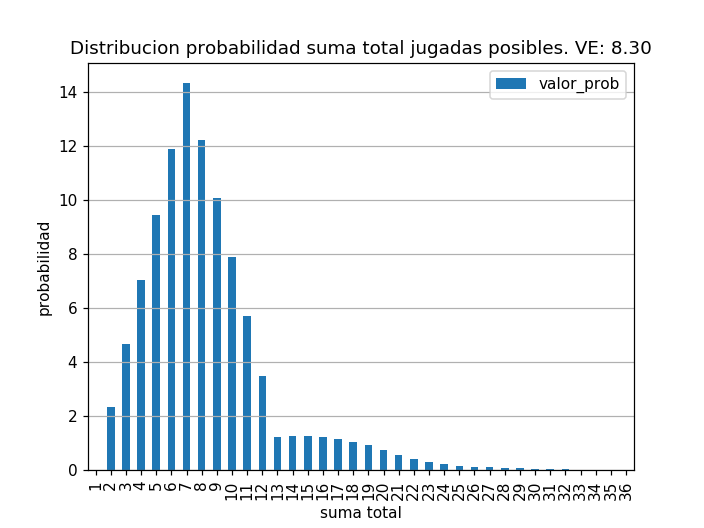

In [41]:
%matplotlib notebook
probTotalDF.plot(kind='bar',x='valor_metrica',y='valor_prob')
titulo = "Distribucion probabilidad suma total jugadas posibles. VE: " + "{0:.2f}".format(valorEsperadoTotal)
plt.title(titulo)
plt.xlabel("suma total")
plt.ylabel("probabilidad")
plt.grid(axis='y')
plt.show()

<IPython.core.display.Javascript object>


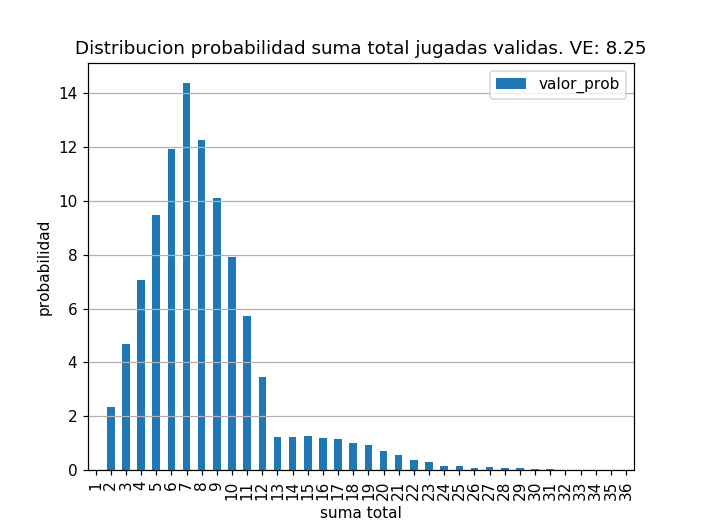

In [40]:
%matplotlib notebook
probTotalValidasDF.plot(kind='bar',x='valor_metrica',y='valor_prob')
titulo = "Distribucion probabilidad suma total jugadas validas. VE: " + "{0:.2f}".format(valorEsperadoTotalValidas)
plt.title(titulo)
plt.xlabel("suma total")
plt.ylabel("probabilidad")
plt.grid(axis='y')
plt.show()

<IPython.core.display.Javascript object>


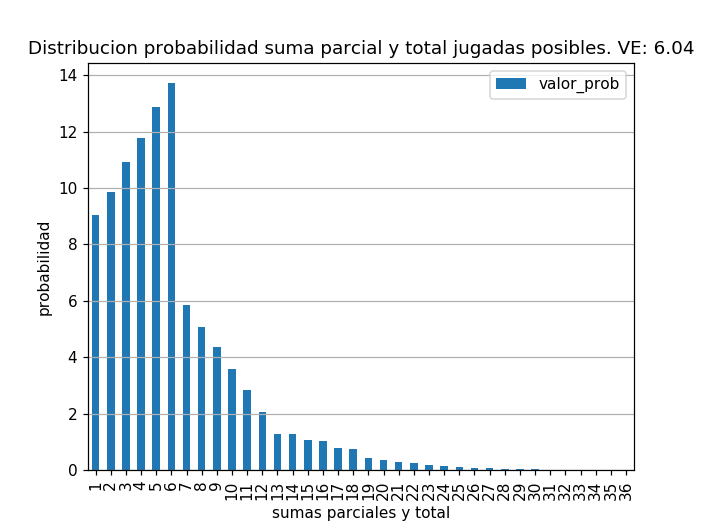

In [39]:
%matplotlib notebook
probParcialTotalDF.plot(kind='bar',x='valor_metrica',y='valor_prob')
titulo = "Distribucion probabilidad suma parcial y total jugadas posibles. VE: " + "{0:.2f}".format(valorEsperadoParcialTotal)
plt.title(titulo)
plt.xlabel("sumas parciales y total")
plt.ylabel("probabilidad")
plt.grid(axis='y')
plt.show()

<IPython.core.display.Javascript object>


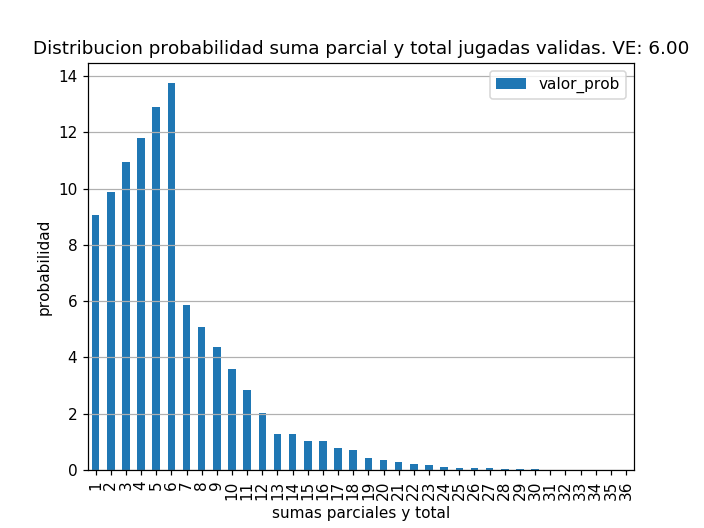

In [36]:
%matplotlib notebook
probParcialTotalValidasDF.plot(kind='bar',x='valor_metrica',y='valor_prob')
titulo = "Distribucion probabilidad suma parcial y total jugadas validas. VE: " + "{0:.2f}".format(valorEsperadoParcialTotalValidas)
plt.title(titulo)
plt.xlabel("sumas parciales y total")
plt.ylabel("probabilidad")
plt.grid(axis='y')
plt.show()

Como podemos ver, las distribuciones de probabilidad para la suma total difiere mucho de la distribuciones de probabilidad para las sumas parciales y total, por lo que vamos a analizarlas por separado. Sin embargo, guardan similitud en que valores bajos de las sumas son más probables que valores altos.  
  
En cuanto a la distribución de probabilidad de la suma total, que se relaciona con el avance total de una ficha por cada jugada, vemos que tiene un máximo de probabilidad en $7$ y un valor esperado de $8.30$, que disminuye a $8.25$ si solo consideramos las jugadas validas. Por tanto, una ficha tardará de media unas $9$ tiradas en recorrer las $73$ casillas del tablero, si estuviera libre de obstaculos. Esta situación suele ocurrir a final de la partida cuando ya casi todas las fichas estan en casa y el juego se reduce a una carrera hasta meter la última ficha en casa.  
  
En cuanto a la distribución de probabilidad de sumas parciales y suma total, que se relaciona con la probabilidad de avance de una ficha hacia un cierto objetivo, ya sea una casilla segura o la ficha de un contrincante, vemos que aumenta gradualmente la probabilidad hasta que toma el valor máximo en $6$ a partir del cual, desciende primero bruscamente y después gradualmente. En esta distribución no hay una variación notable entre las jugadas posibles y las válidas, tampoco casi en su valor esperado de $6$. Por tanto, entendemos que en una jugada, lo más probable es que nos salga un $6$, entonces, nunca hay que posicionarse a $6$ casillas por delante del rival, si es posible a más de este número, pero sino, a menos.  
  
  
Falta por responder a una cuestión que planteamos a mitad de este notebook, ¿cuál es el porcentaje de jugadas válidas e inválidas frente al total? Como vimos, las jugadas inválidas no son el {{"{0:.1f}".format(((numPosiblesJugadas - numPosiblesJugadasValidas)/numPosiblesJugadas) * 100)}}% del total pues las todas las jugadas no son equiprobables.  
Para calcular este porcentaje, vamos a desarrollar una función como _calculateDistribucionProbabilidad_ pero que dentro de ella calcule varias distribuciones de probabilidad, una para las jugadas posibles, otra para las válidas y otra para las inválidas. Después, normalizaremos todas las distribuciones poniendo como referencia la distribución de jugadas posibles y así tendremos que la distribución de de probabilidad de las jugadas válidas e inválidas es un cierto porcentaje de la distribución* de jugadas posibles. Con esta normalización conseguimos que la suma de la distribución de probabilidad de las jugadas válidas, más la suma de las inválidas tiene como resultado la suma de la distribución de las jugadas posibles.  
  
  
  
*Usamos la expresión "porcentaje de la distribución" como  abuso del lenguaje, pues más concretamente tendríamos que decir que, cada valor de las distribuciones de jugadas válidas e inválidas es un cierto porcentaje del mismo valor de la distribución de las jugadas inválidas y que este porcentaje para cada valor puede depende del valor.

In [37]:
## Funcion que dada una distribucion de jugadas para una metrica calcula la suma de probabilidades de:
# Jugadas posibles
# Jugadas posibles validas
# Jugadas posibles invalidas
def calculateSumaProbabilidadesDistribucionesPosiblesValidasInvalidas(jugadasDistr: list):
    
    ## Creamos una funcion que nos sume las probabilidades de una distribucion
    def calculateSumaProbabilidadesDistribucion(probabilidadDistr: list):
        suma = 0
        for probabilidad in probabilidadDistr:
            suma = suma + probabilidad
        
        return suma
    
    
    ##Inicializamos las distribuciones de probabilidad
    probabilidadesPosibles = []
    probabilidadesPosiblesValidas = []
    probabilidadesPosiblesInvalidas = []
        
    for jugadas in jugadasDistr:
        probabilidadPosibles = 0
        probabilidadPosiblesValidas = 0
        probabilidadPosiblesInvalidas = 0
        
        for jugada in jugadas:
            if isInvalida(jugada):
                probabilidadPosiblesInvalidas = probabilidadPosiblesInvalidas + calculateProbabilidadJugada(jugada)
            else:
                probabilidadPosiblesValidas = probabilidadPosiblesValidas + calculateProbabilidadJugada(jugada)
            probabilidadPosibles = probabilidadPosibles + calculateProbabilidadJugada(jugada)
        
        
        probabilidadesPosibles.append(probabilidadPosibles)
        probabilidadesPosiblesValidas.append(probabilidadPosiblesValidas)
        probabilidadesPosiblesInvalidas.append(probabilidadPosiblesInvalidas)
    
    ##Normalizamos a 100 (se puede cambiar si se desea, pe: 1) la distribución de probabilidad
    normalizacion = 100
    
    sumaPosibles = calculateSumaProbabilidadesDistribucion(probabilidadesPosibles)
    
    ##Normalizamos teniendo en cuenta la distribucion de jugadas posibles
    probabilidadesNormalizadasPosibles = []
    probabilidadesNormalizadasPosiblesValidas = []
    probabilidadesNormalizadasPosiblesInvalidas = []
    
    for probabilidad in probabilidadesPosibles:
        probabilidadesNormalizadasPosibles.append((probabilidad / sumaPosibles) * normalizacion)
    
    for probabilidad in probabilidadesPosiblesValidas:
        probabilidadesNormalizadasPosiblesValidas.append((probabilidad / sumaPosibles) * normalizacion)
    
    for probabilidad in probabilidadesPosiblesInvalidas:
        probabilidadesNormalizadasPosiblesInvalidas.append((probabilidad / sumaPosibles) * normalizacion)
    
    ##Sumamos todas las probabilidades de cada distribucion de probabilidad normalizada
    sumaPosiblesNormalizada = calculateSumaProbabilidadesDistribucion(probabilidadesNormalizadasPosibles)
    sumaPosiblesValidasNormalizada = calculateSumaProbabilidadesDistribucion(probabilidadesNormalizadasPosiblesValidas)
    sumaPosiblesInvalidasNormalizada = calculateSumaProbabilidadesDistribucion(probabilidadesNormalizadasPosiblesInvalidas)
    
        
    return [sumaPosiblesNormalizada, sumaPosiblesValidasNormalizada, sumaPosiblesInvalidasNormalizada]

Si aplicamos esta función al acumulador de jugadas posibles para la métrica de la suma total, que tiene todas la jugadas posibles sin repetición alguna (como ocurre en el acumulador de jugadas posibles para la métrica de sumas parciales y suma total), obtendremos estos porcentajes que buscamos:

In [38]:
sumasProbabilidades = calculateSumaProbabilidadesDistribucionesPosiblesValidasInvalidas(accJugadasTotal)
sumaProbabilidadesPosibles = sumasProbabilidades[0]
sumaProbabilidadesPosiblesValidas = sumasProbabilidades[1]
sumaProbabilidadesPosiblesInvalidas = sumasProbabilidades[2]

Por tanto, el porcentaje de jugadas inválidas frente al total es de un **{{"{0:.2f}".format(sumaProbabilidadesPosiblesInvalidas)}}%**, muy lejos del {{"{0:.1f}".format(((numPosiblesJugadas - numPosiblesJugadasValidas)/numPosiblesJugadas) * 100)}}% cuando estabamos considerando todas las jugadas equiprobables. Las jugadas invalidas esta en relación **1 / {{"{0:.0f}".format(sumaProbabilidadesPosiblesValidas / sumaProbabilidadesPosiblesInvalidas)}}** con respecto a las válidas, es decir que de cada {{"{0:.0f}".format((sumaProbabilidadesPosiblesValidas / sumaProbabilidadesPosiblesInvalidas) + 1)}} jugadas, solo 1 será invalida, mientras que el resto válidas.

### **Conclusiones**

1. Las jugadas en el parchís no son equiprobables.
2. El avance medio por jugada es de $8.25$.
3. Nunca te posiciones a $6$ casillas por delante del rival, preferiblemente más, pero sino, menos.
4. Si tu intención es comer al rival, procede a la inversa que la conclusión anterior.
5. La probabilidad de que te toque una jugada inválida es de $1$ vez cada $258$ jugadas.